In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
pokemon = pd.read_csv("Pokemon.csv", index_col=0)
pokemon.head()

Name Type 1  Type 2  Total  HP  Attack  Defense  Sp. Atk  \
#                                                                              
1              Bulbasaur  Grass  Poison    318  45      49       49       65   
2                Ivysaur  Grass  Poison    405  60      62       63       80   
3               Venusaur  Grass  Poison    525  80      82       83      100   
3  VenusaurMega Venusaur  Grass  Poison    625  80     100      123      122   
4             Charmander   Fire     NaN    309  39      52       43       60   

   Sp. Def  Speed  Generation  Legendary  
#                                         
1       65     45           1      False  
2       80     60           1      False  
3      100     80           1      False  
3      120     80           1      False  
4       50     65           1      False

And now, the plots:

In [4]:
pokemon.columns

Index(['Name', 'Type 1', 'Type 2', 'Total', 'HP', 'Attack', 'Defense',
       'Sp. Atk', 'Sp. Def', 'Speed', 'Generation', 'Legendary'],
      dtype='object')

In [5]:
df_pokemon = pokemon[['Total', 'HP', 'Attack', 'Defense',
       'Sp. Atk', 'Sp. Def', 'Speed', 'Generation', 'Legendary']].reset_index(drop=True)

In [6]:
import seaborn as sns

In [7]:
cm = sns.light_palette("green", as_cmap=True)
s = df_pokemon.style.background_gradient(cmap=cm)
s

In [8]:
df_pokemon.loc[:4].style.background_gradient(cmap='Blues')

<Axes: >

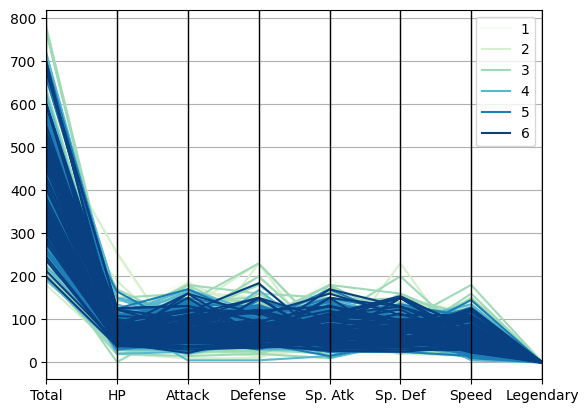

In [9]:
pd.plotting.parallel_coordinates(
    df_pokemon, 'Generation', colormap= 'GnBu')

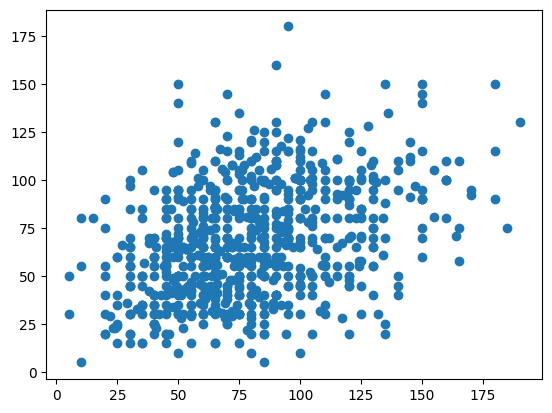

In [13]:
import matplotlib.pyplot as plt
plt.plot(df_pokemon['Attack'], df_pokemon['Speed'],
         linestyle='none',marker='o')

(array([  6.,  20.,  61.,  98., 138.,  98., 128.,  85.,  54.,  45.,  33.,
         16.,  11.,   2.,   5.]),
 array([  5.        ,  17.33333333,  29.66666667,  42.        ,
         54.33333333,  66.66666667,  79.        ,  91.33333333,
        103.66666667, 116.        , 128.33333333, 140.66666667,
        153.        , 165.33333333, 177.66666667, 190.        ]),
 <BarContainer object of 15 artists>)

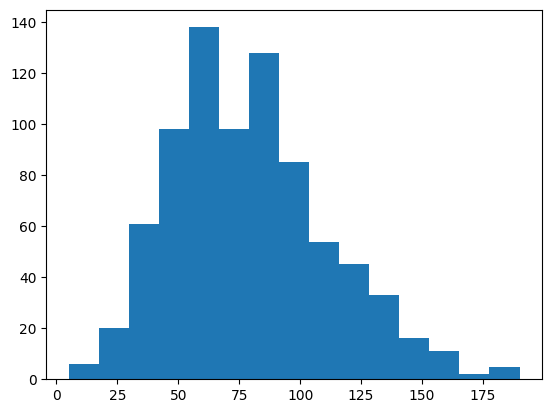

In [14]:
plt.hist(df_pokemon['Attack'], bins=15)

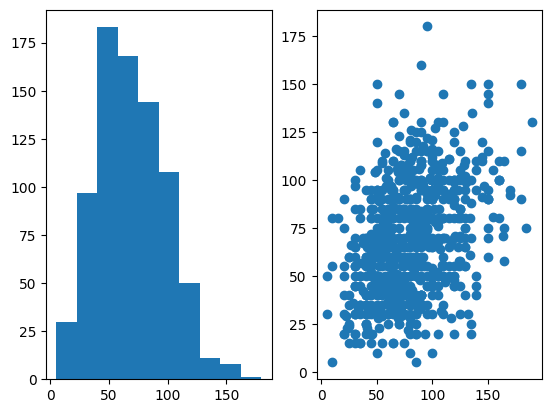

In [15]:
fig, axes = plt.subplots(1,2)
axes[0].hist(df_pokemon['Speed'])
axes[1].scatter(df_pokemon['Attack'], df_pokemon['Speed'])

# Parte IV. Seaborn

<__array_function__ internals>:180: RuntimeWarning: Converting input from bool to <class 'numpy.uint8'> for compatibility.


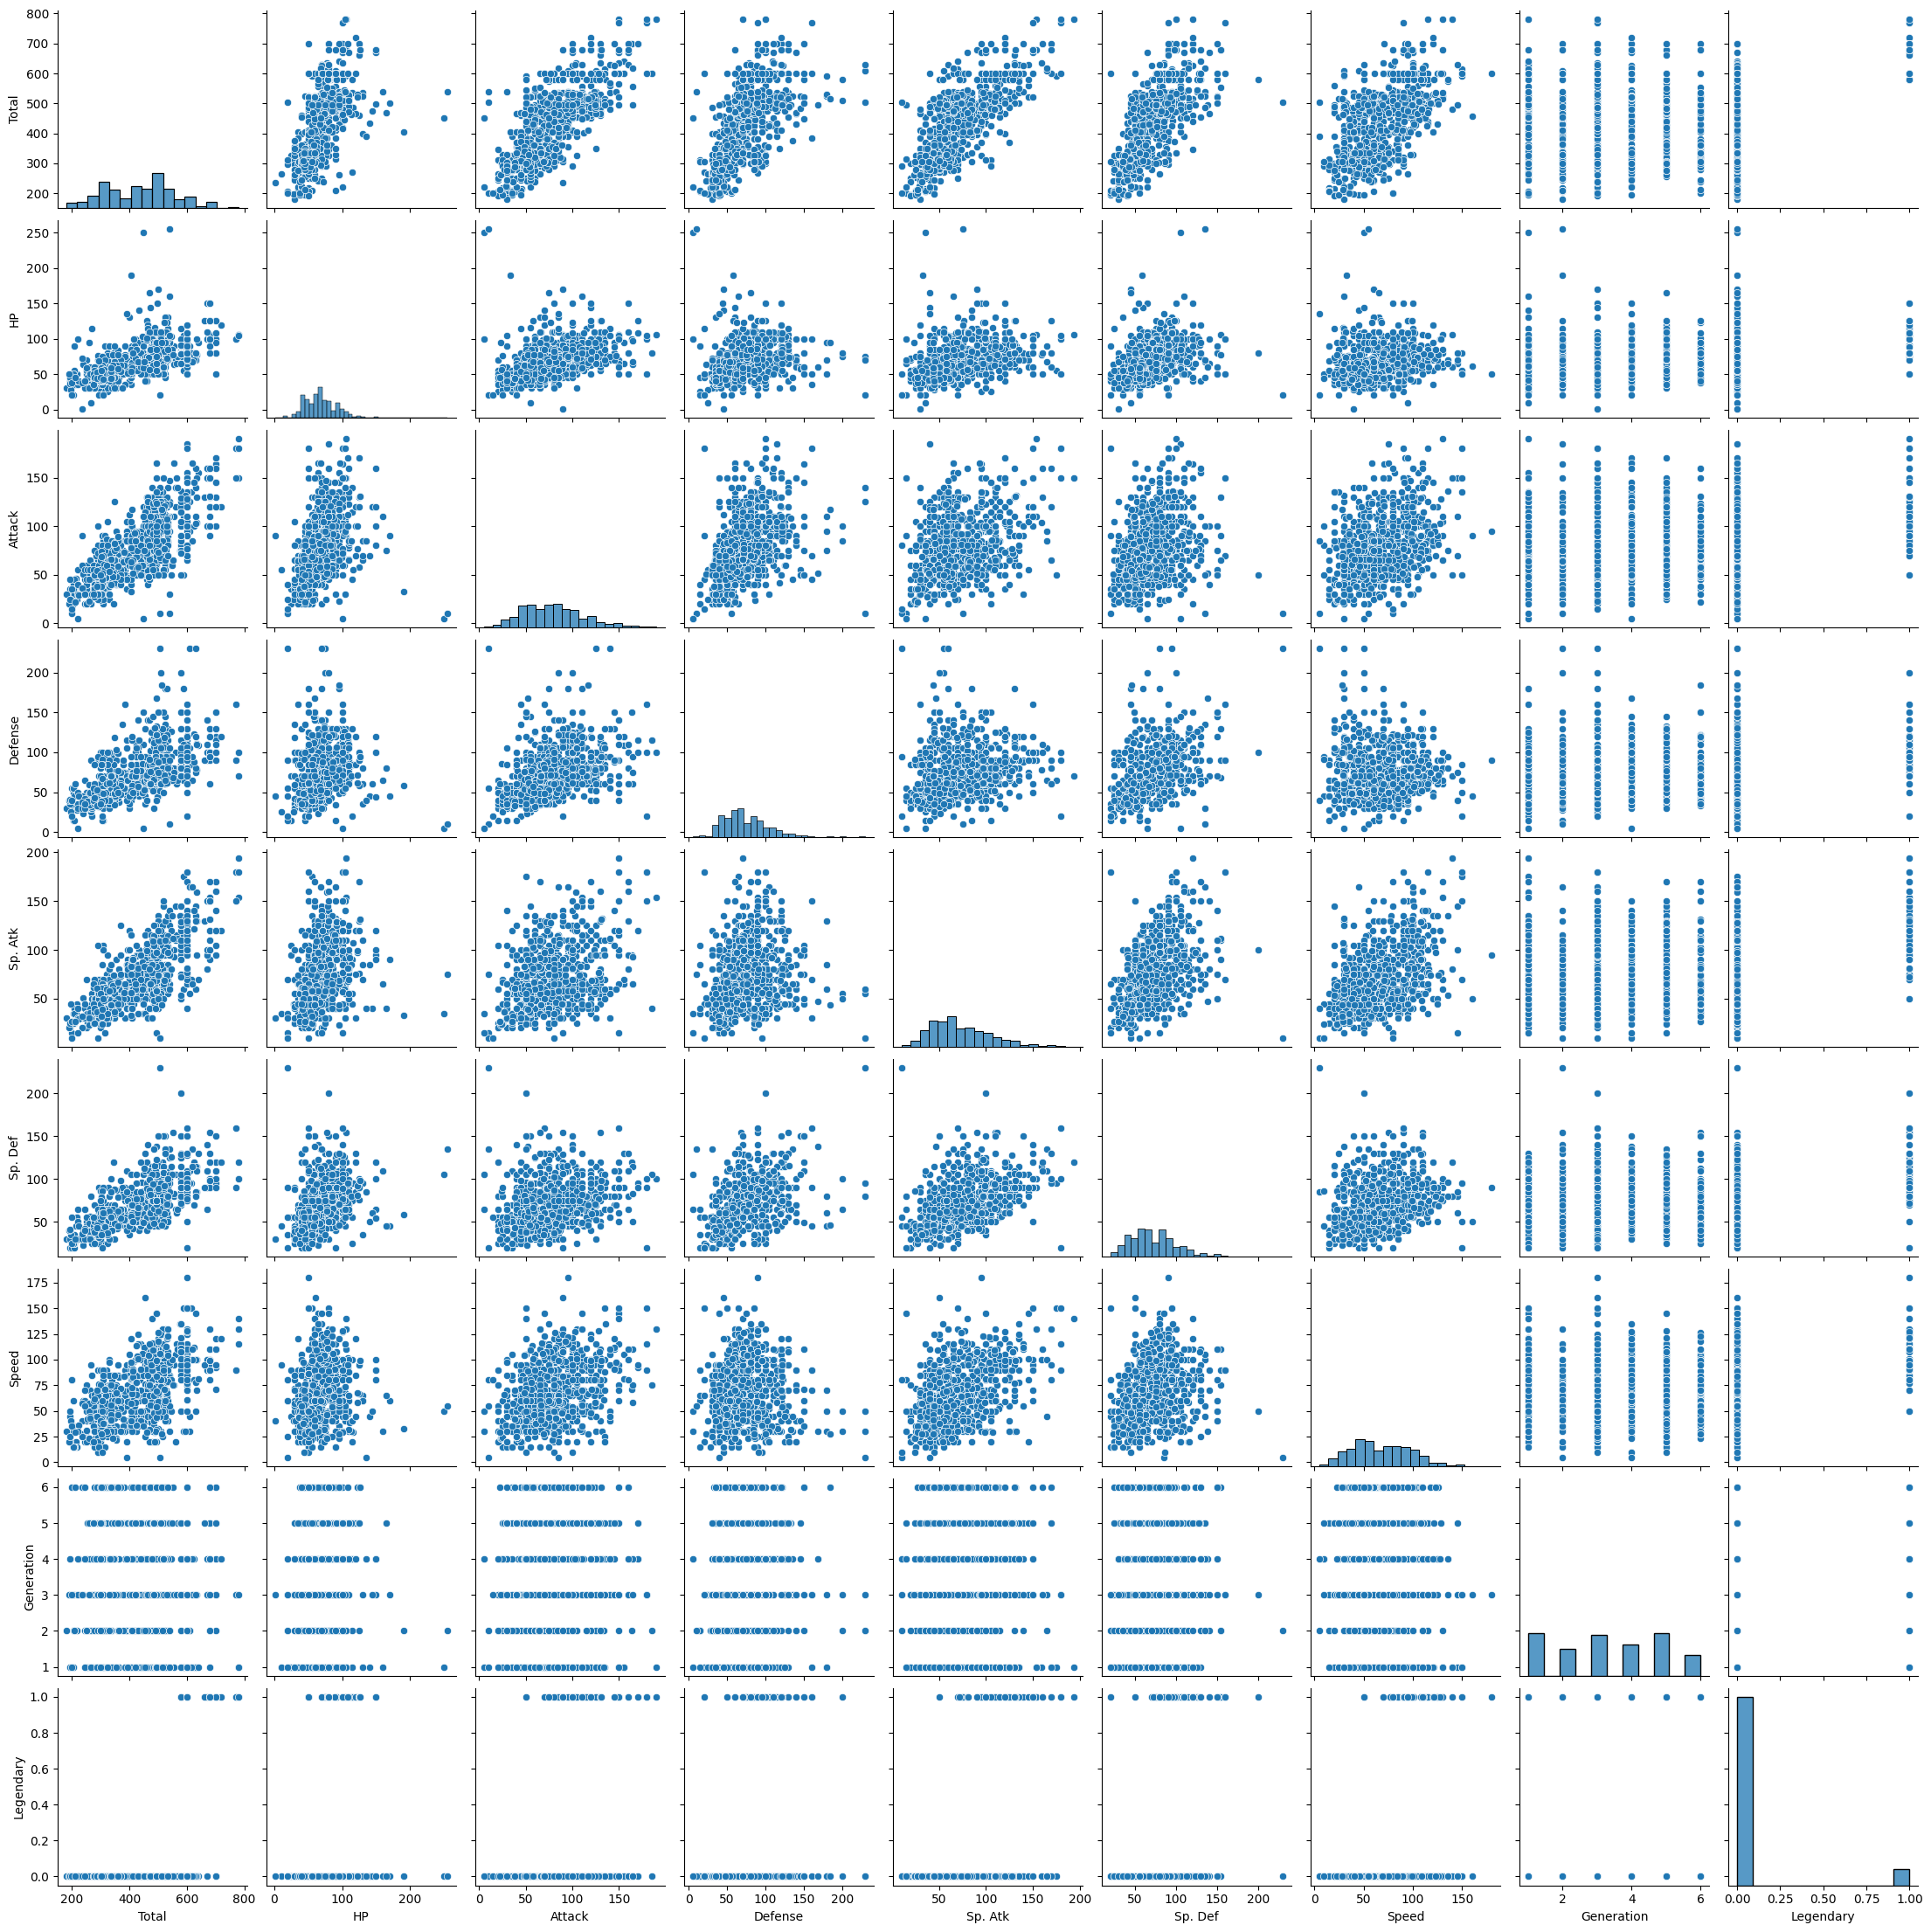

In [16]:
sns.pairplot(df_pokemon)

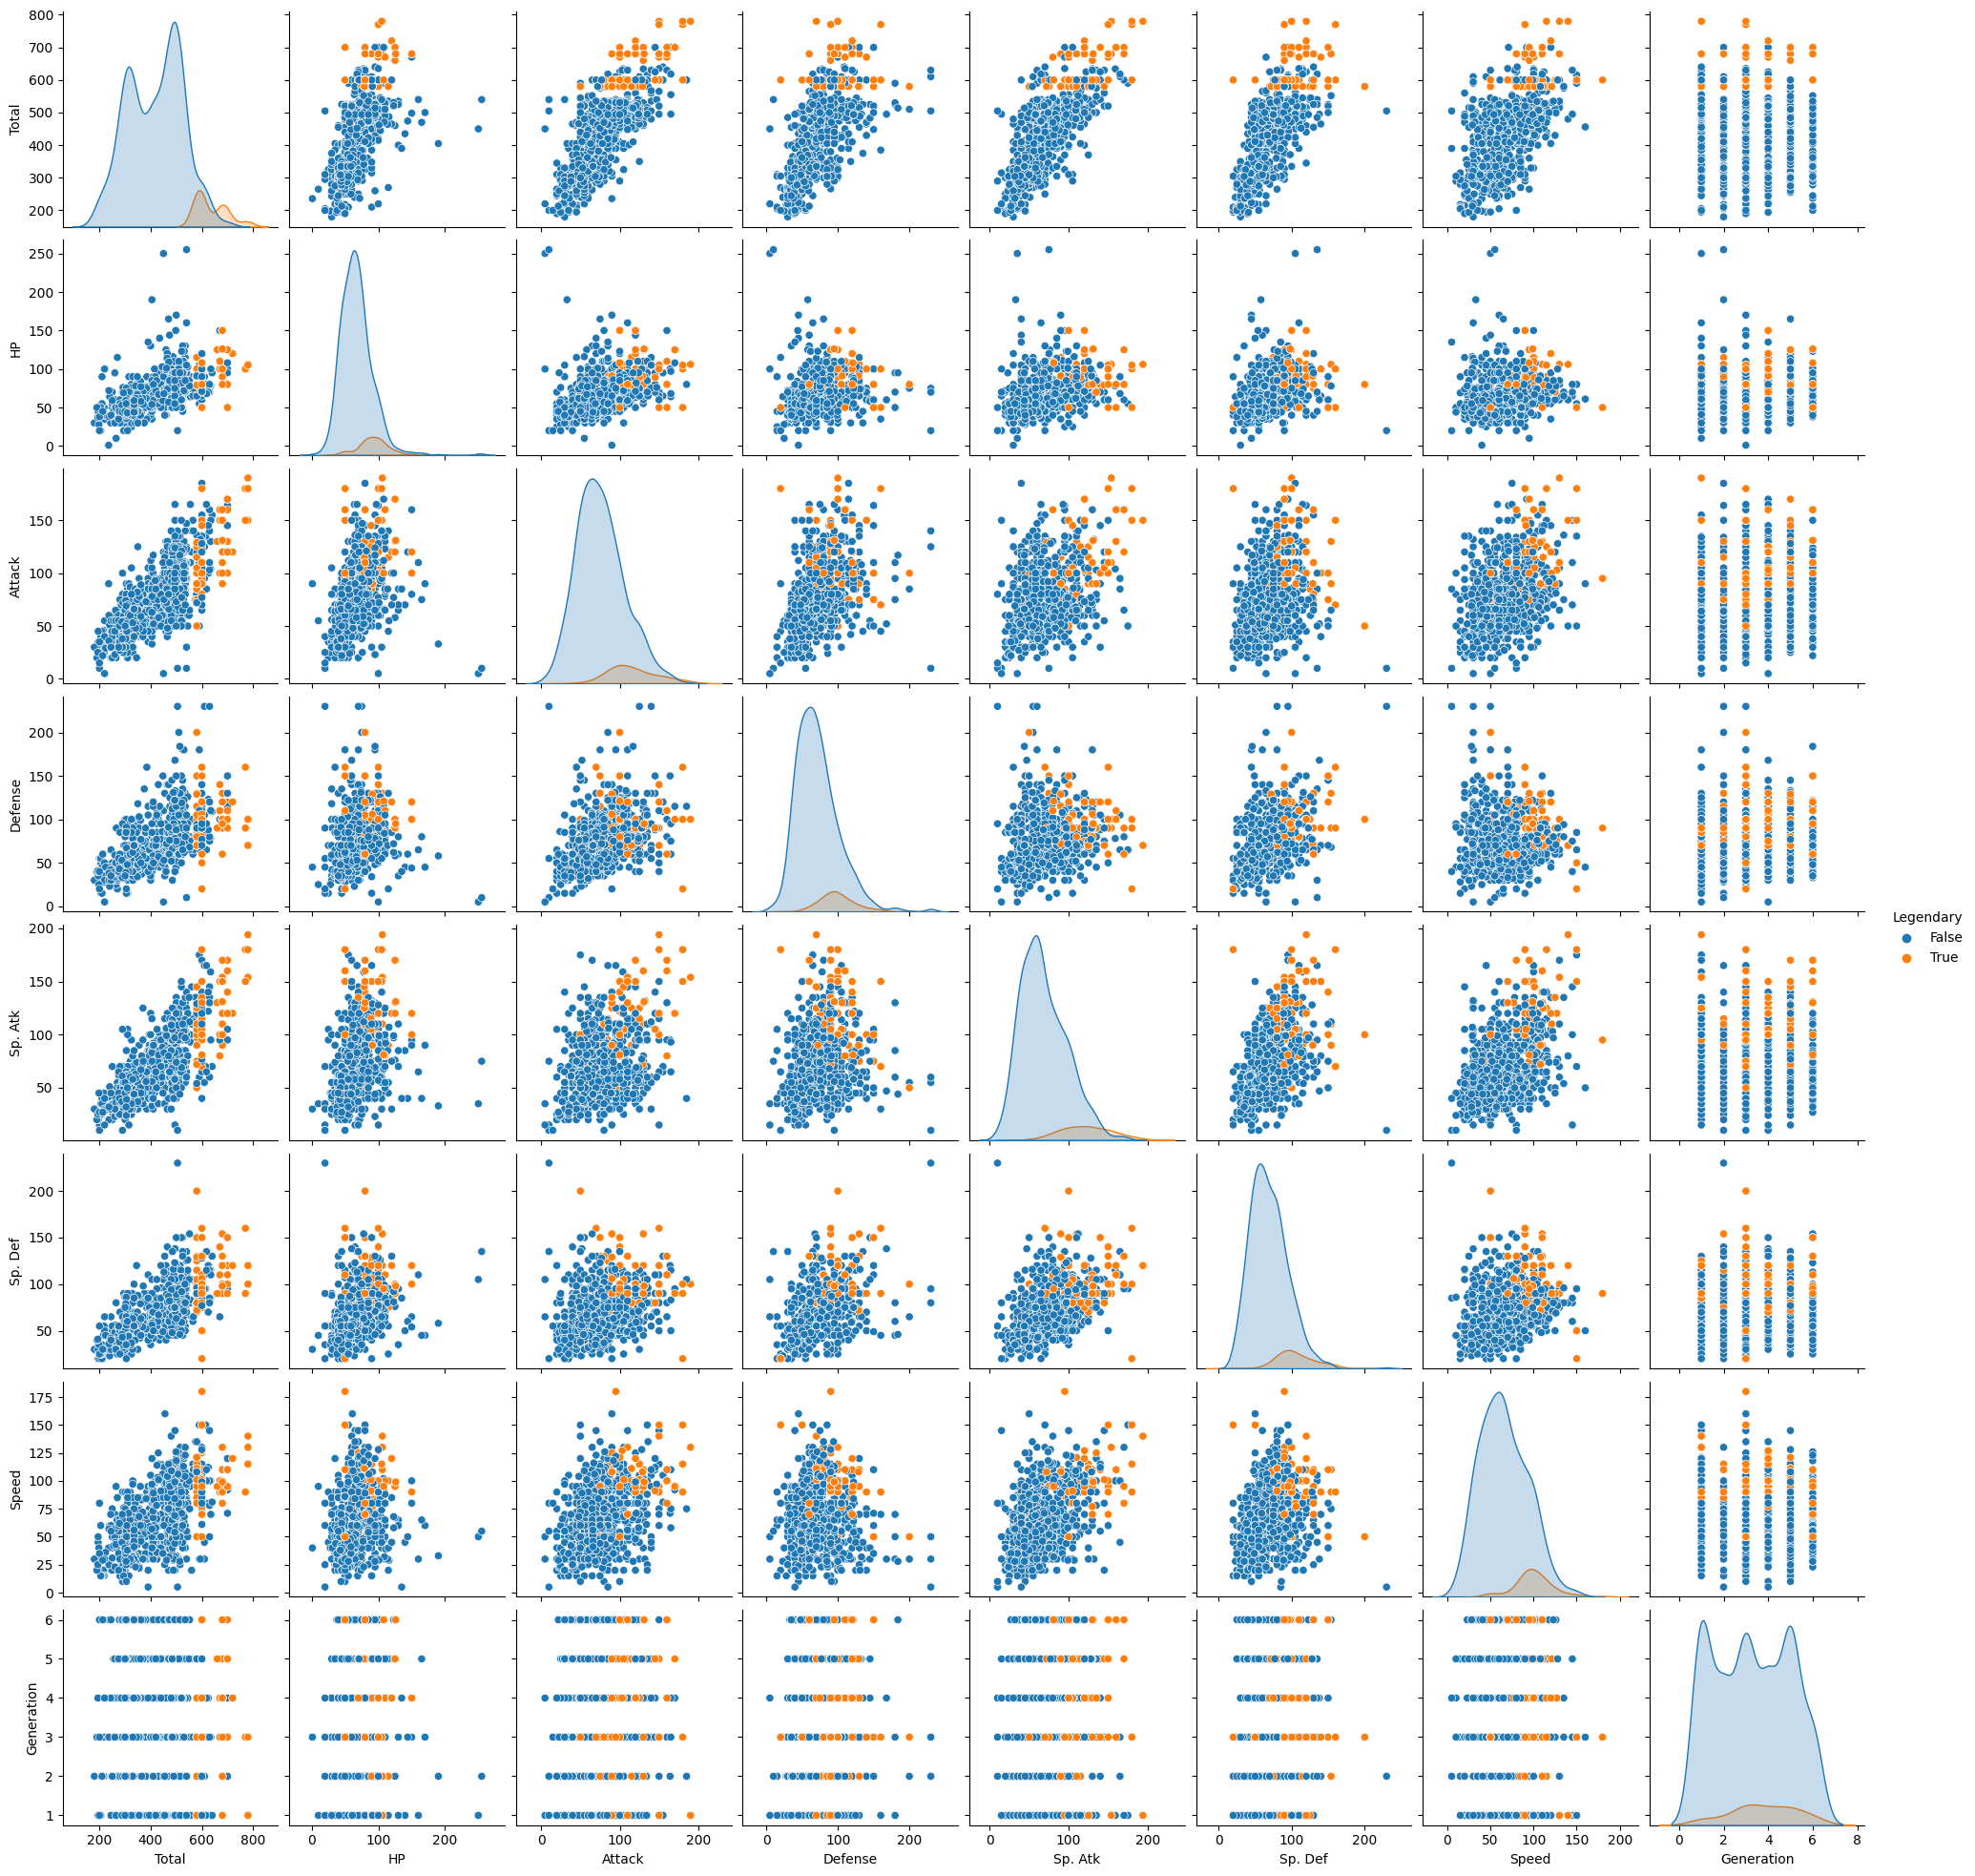

In [17]:
sns.pairplot(df_pokemon, hue='Legendary')

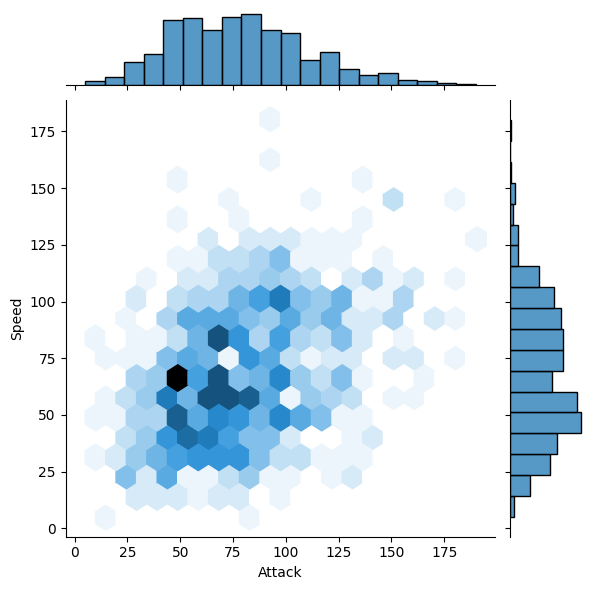

In [18]:
sns.jointplot(x='Attack', y='Speed',data=df_pokemon,
              kind='hex')

<ipython-input-19-1cb9b1853930>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(pokemon['HP'])


<Axes: xlabel='HP', ylabel='Density'>

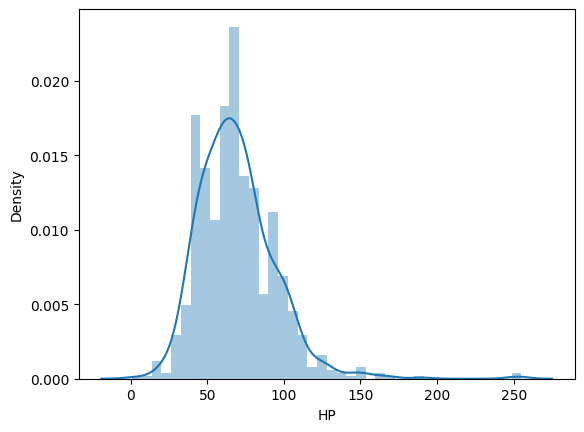

In [19]:
sns.distplot(pokemon['HP'])

<ipython-input-20-77d32f41de3b>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  dataplot = sns.heatmap(pokemon.corr(), cmap="YlGnBu", annot=True)


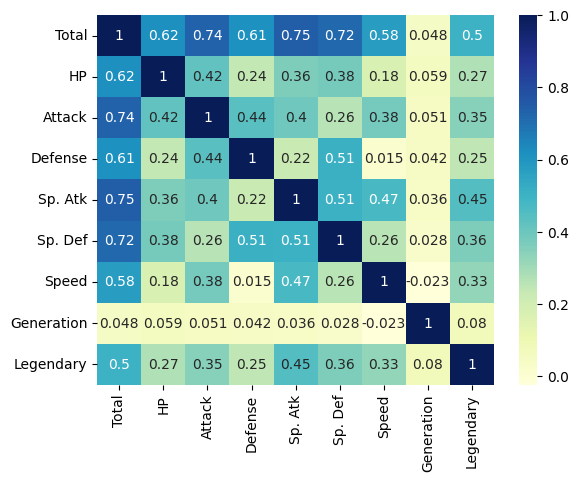

In [20]:
# plotting correlation heatmap
dataplot = sns.heatmap(pokemon.corr(), cmap="YlGnBu", annot=True)

# displaying heatmap
plt.show()

<Axes: xlabel='Attack', ylabel='Defense'>

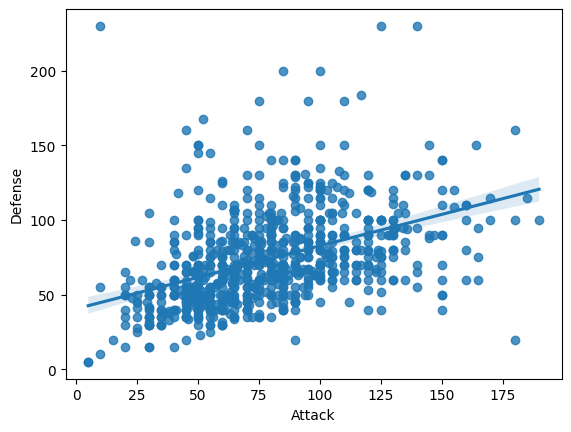

In [21]:
sns.regplot(x='Attack', y='Defense',data=pokemon)

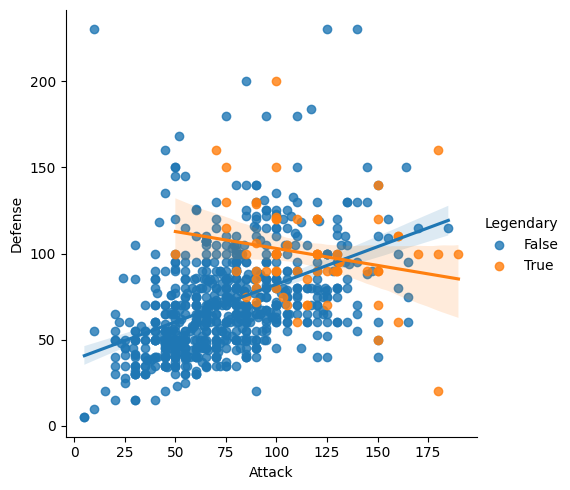

In [22]:
sns.lmplot(x='Attack', y='Defense',data=pokemon,
           hue='Legendary')

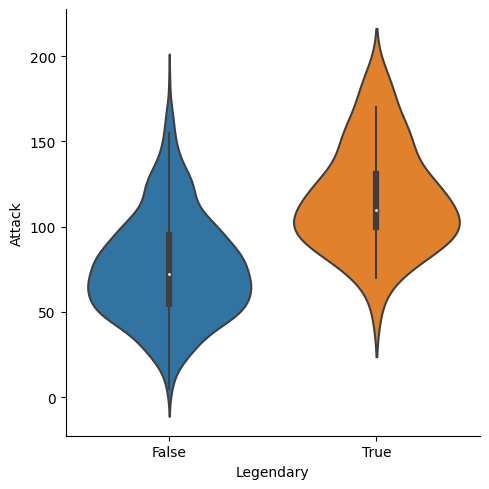

In [23]:
sns.catplot(x='Legendary', y='Attack', data=pokemon,kind='violin')

In [24]:
from bokeh.sampledata.iris import flowers

colormap = {'setosa': 'red', 'versicolor': 'green', 'virginica': 'blue'}
colors = [colormap[x] for x in flowers['species']]

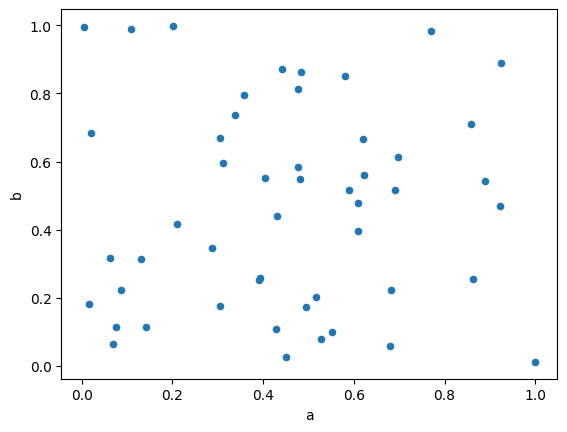

In [30]:
df = pd.DataFrame(np.random.rand(50, 4), columns=['a', 'b', 'c', 'd'])
df.plot.scatter(x='a', y='b');

<Axes: >

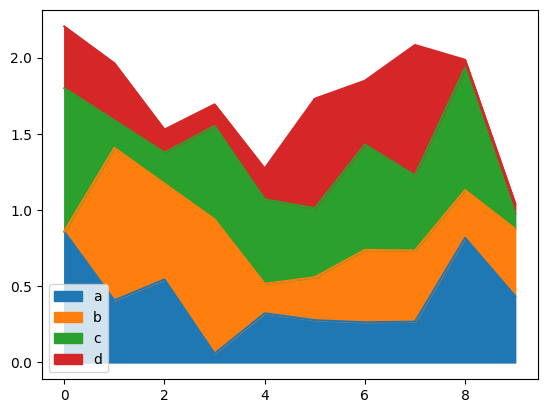

In [31]:
df = pd.DataFrame(np.random.rand(10, 4), columns=['a', 'b', 'c', 'd'])
df.plot.area()

In [32]:
import altair as alt
from vega_datasets import data

source = data.cars()

alt.Chart(source).mark_tick().encode(
    x='Horsepower:Q',
    y='Cylinders:O'
)

alt.Chart(...)

In [33]:
alt.Chart(source).mark_tick().encode(
    x='Horsepower:Q',
    y='Cylinders:O',
    tooltip=['Horsepower', 'Cylinders']
).interactive()

alt.Chart(...)

In [34]:
import altair as alt
from vega_datasets import data

source = data.cars()

line = alt.Chart(source).mark_line().encode(
    x='Year',
    y='mean(Miles_per_Gallon)'
)


In [35]:
band = alt.Chart(source).mark_errorband(extent='ci').encode(
    x='Year',
    y=alt.Y('Miles_per_Gallon', title='Miles/Gallon'),
)

band + line

alt.LayerChart(...)